<a href="https://www.pieriandata.com"><img src="../Pierian_Data_Logo.PNG"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras Syntax Basics

With TensorFlow 2.0 , Keras is now the main API choice. Let's work through a simple regression project to understand the basics of the Keras syntax and adding layers.

## The Data

To learn the basic syntax of Keras, we will use a very simple fake data set, in the subsequent lectures we will focus on real datasets, along with feature engineering! For now, let's focus on the syntax of TensorFlow 2.0.

Let's pretend this data are measurements of some rare gem stones, with 2 measurement features and a sale price. Our final goal would be to try to predict the sale price of a new gem stone we just mined from the ground, in order to try to set a fair price in the market.

### Load the Data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('../DATA/fake_reg.csv')

In [10]:
df.head() #this is fake data

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

### Explore the data

Let's take a quick look, we should see strong correlation between the features and the "price" of this made up product.

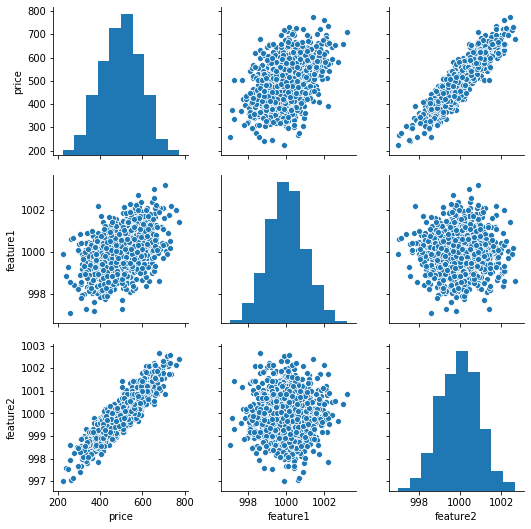

In [11]:
sns.pairplot(df)
#observations: feature 2 appears to have a very high correlation with the price

Feel free to visualize more, but this data is fake, so we will focus on feature engineering and exploratory data analysis later on in the course in much more detail!

### Test/Train Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Convert Pandas to Numpy for Keras (same process as usual, but need numpy arrays)

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

In [14]:
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
X_train.shape #notice we can't do head because it is now a numpy array

(700, 2)

In [16]:
X_train #^...see

array([[1001.63407565,  998.80950388],
       [ 999.76150137,  998.41802414],
       [ 998.2638401 , 1000.92030063],
       ...,
       [1000.47386523, 1001.44542815],
       [ 998.8625673 ,  999.15662112],
       [1000.55690247,  999.35441706]])

In [17]:
X_test.shape

(300, 2)

In [18]:
y_train.shape

(700,)

In [19]:
y_test.shape

(300,)

## Normalizing/Scaling the Data

We scale the feature data.

[Why we don't need to scale the label](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#help(MinMaxScaler)

In [22]:
scaler = MinMaxScaler()

In [23]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [24]:
#fit MinMaxScaler to our training set
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
#transform our data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
X_train #our values have been scaled

array([[0.74046017, 0.32583248],
       [0.43166001, 0.2555088 ],
       [0.18468554, 0.70500664],
       ...,
       [0.54913363, 0.79933822],
       [0.2834197 , 0.38818708],
       [0.56282703, 0.42371827]])

In [27]:
X_train.max() #notice that our min-max is 0-1

1.0

# TensorFlow 2.0 Syntax


## Import Options

There are several ways you can import Keras from Tensorflow (this is hugely a personal style choice, please use any import methods you prefer). We will use the method shown in the **official TF documentation**.

In [2]:
#tensorflow version 2.0.0 works
pip install tensorflow==2.0.0

  Using cached https://files.pythonhosted.org/packages/4e/35/11749bf99b2d4e3cceb4d55ca22590b0d7c2c62b9de38ac4a4a7f4687421/gast-0.2.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c3/88/97eef84f48fa04fbd6750e62dcceafba6c63c81b7ac1420856c8dcc0a3f9/astor-0.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7546 sha256=a166201bf56980b371f4c20307d2ad625c8e672cf352b06d1c36ac2f436f643b
  Stored in directory: C:\Users\ianno\AppData\Local\pip\Cache\wheels

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential

In [20]:
#help(Sequential)

Help on class Sequential in module tensorflow.python.keras.engine.sequential:

class Sequential(tensorflow.python.keras.engine.training.Model)
 |  Sequential(layers=None, name=None)
 |  
 |  Linear stack of layers.
 |  
 |  Arguments:
 |      layers: list of layers to add to the model.
 |  
 |  Example:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = Sequential()
 |  model.add(Dense(32, input_shape=(500,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(Dense(32))
 |  
 |  # This is identical to the following:
 |  model = Sequential()
 |  model.add(Dense(32, input_dim=500))
 |  
 |  # And to the following:
 |  model = Sequential()
 |  model.add(Dense(32, batch_input_shape=(None, 500)))
 |  
 |  # Note that you can also omit the `input_shape` argument:
 |  # In that case the model gets built the first time you call `fit` (or other
 |  # training and evaluation methods).
 |  model = Sequential()
 |  model.add(Dense

## Creating a Model

There are two ways to create models through the TF 2 Keras API, either pass in a list of layers all at once, or add them one by one.

Let's show both methods (its up to you to choose which method you prefer).

In [3]:
#this is all we need to import to build a very simple ANN model in Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Model - as a list of layers

In [4]:
#one way to create the model is to set up sequential and then add layers to it
model = Sequential([Dense(units=4, activation='relu'),
                   Dense(2,activation='relu'),
                   Dense(1)])
#if something is "densely" connected, will be a normal feed-forward network where every neuron in one layer is connected to every neuron in the following layer
#units (from dense) are how many neurons are in the layer
#activation (from dense) is what activation function we use (e.g., sigmoid, relu, tanh)

### Model - adding in layers one by one

In [23]:
#IMPORTANT: this is the preferred method (produces exact same thing as above)
model = Sequential() #create empty sequential model

model.add(Dense(4,activation='relu')) #then off of that model variable, add layers separately
model.add(Dense(2,activation='relu')) #one at a time...
model.add(Dense(2)) #ending point

#this method is useful because we can easily turn off a layer by commenting it out

Let's go ahead and build a simple model and then compile it by defining our solver

In [6]:
model = Sequential() #create empty sequential model

model.add(Dense(4,activation='relu')) #add in layers separately
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1)) #add in final output node (dense units = 1)

model.compile(optimizer='rmsprop',loss='mse') #we select mse since we're performing a regression-based task

#compile() will measure our model against the true results
#optimizer parameter identifies how we want to perform our gradient descent (e.g., Adam)
#loss parameter will change dependent on our goal (see below, e.g., binary_crossentropy)

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [28]:
model.fit(x=X_train, y=y_train, epochs=250)
#epochs are the # of times that it passes through the entire dataset
#notice how below we see our loss function decrease with each epoch iteration
#we will see how to choose this epoch number optimally (cross-validation...)

Train on 700 samples
Epoch 1/250
700/700 [==============================] - 1s 1ms/sample - loss: 256685.5791
Epoch 2/250
700/700 [==============================] - 0s 44us/sample - loss: 256619.3266
Epoch 3/250
700/700 [==============================] - 0s 42us/sample - loss: 256545.7838
Epoch 4/250
700/700 [==============================] - 0s 40us/sample - loss: 256454.7745
Epoch 5/250
700/700 [==============================] - 0s 54us/sample - loss: 256345.0186
Epoch 6/250
700/700 [==============================] - 0s 52us/sample - loss: 256215.6516
Epoch 7/250
700/700 [==============================] - 0s 69us/sample - loss: 256065.6871
Epoch 8/250
700/700 [==============================] - 0s 65us/sample - loss: 255893.3324
Epoch 9/250
700/700 [==============================] - 0s 50us/sample - loss: 255696.1260
Epoch 10/250
700/700 [==============================] - 0s 39us/sample - loss: 255472.5370
Epoch 11/250
700/700 [==============================] - 0s 40us/sample - loss: 

700/700 [==============================] - 0s 44us/sample - loss: 10042.4250
Epoch 92/250
700/700 [==============================] - 0s 41us/sample - loss: 7557.4240
Epoch 93/250
700/700 [==============================] - 0s 40us/sample - loss: 5505.8297
Epoch 94/250
700/700 [==============================] - 0s 38us/sample - loss: 3895.3075
Epoch 95/250
700/700 [==============================] - 0s 35us/sample - loss: 2678.8696
Epoch 96/250
700/700 [==============================] - 0s 39us/sample - loss: 1890.3694
Epoch 97/250
700/700 [==============================] - 0s 40us/sample - loss: 1527.0039
Epoch 98/250
700/700 [==============================] - 0s 42us/sample - loss: 1421.5903
Epoch 99/250
700/700 [==============================] - 0s 38us/sample - loss: 1389.6326
Epoch 100/250
700/700 [==============================] - 0s 43us/sample - loss: 1366.9172
Epoch 101/250
700/700 [==============================] - 0s 50us/sample - loss: 1344.2546
Epoch 102/250
700/700 [========

Epoch 183/250
700/700 [==============================] - 0s 40us/sample - loss: 92.6544
Epoch 184/250
700/700 [==============================] - 0s 36us/sample - loss: 86.4864
Epoch 185/250
700/700 [==============================] - 0s 39us/sample - loss: 81.8298
Epoch 186/250
700/700 [==============================] - 0s 40us/sample - loss: 76.9112
Epoch 187/250
700/700 [==============================] - 0s 40us/sample - loss: 72.4248
Epoch 188/250
700/700 [==============================] - 0s 37us/sample - loss: 67.7769
Epoch 189/250
700/700 [==============================] - 0s 40us/sample - loss: 64.1842
Epoch 190/250
700/700 [==============================] - 0s 39us/sample - loss: 59.9530
Epoch 191/250
700/700 [==============================] - 0s 37us/sample - loss: 57.4707
Epoch 192/250
700/700 [==============================] - 0s 40us/sample - loss: 54.0770
Epoch 193/250
700/700 [==============================] - 0s 39us/sample - loss: 50.9754
Epoch 194/250
700/700 [=========

## Evaluation

Let's evaluate our performance on our training set and our test set. We can compare these two performances to check for overfitting.

In [29]:
#we can view our training loss history via # of epochs with history function
model.history.history
#observations: we see essentially what we saw in the verbose output above when fitting our ANN model

{'loss': [256685.57910714287,
  256619.32660714287,
  256545.78375,
  256454.77446428573,
  256345.01857142858,
  256215.65160714285,
  256065.68705357143,
  255893.3324107143,
  255696.12598214287,
  255472.5369642857,
  255220.34508928572,
  254940.37517857144,
  254625.50678571427,
  254275.76160714286,
  253891.55232142858,
  253465.01705357144,
  252996.72125,
  252484.3992857143,
  251927.05526785715,
  251319.99401785716,
  250661.06901785714,
  249947.734375,
  249171.88964285713,
  248343.14125,
  247453.641875,
  246497.4504464286,
  245474.83401785715,
  244379.44973214285,
  243208.94714285716,
  241966.78223214287,
  240647.4575,
  239236.8819642857,
  237748.37508928572,
  236168.33696428573,
  234511.13267857142,
  232754.1805357143,
  230898.16830357144,
  228946.3405357143,
  226891.1519642857,
  224748.609375,
  222504.84669642858,
  220139.61276785715,
  217673.7675892857,
  215088.17330357144,
  212405.2192857143,
  209596.13330357143,
  206673.56875,
  203646.02455

In [32]:
#can convert into a dataframe
loss = pd.DataFrame(model.history.history)

In [34]:
loss #preview our loss df

loss
0    256685.579107
1    256619.326607
2    256545.783750
3    256454.774464
4    256345.018571
..             ...
245      24.448346
246      23.835741
247      23.934746
248      24.405708
249      24.083511

[250 rows x 1 columns]

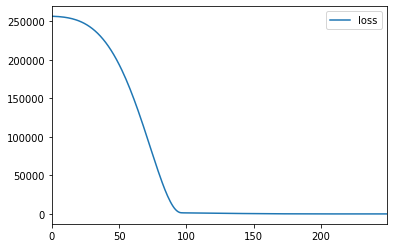

In [42]:
#plot out our ANN loss
loss.plot()
#observations: loss function kind of levels off at 100 epochs (minimal improvement afterwards)

### Compare final evaluation (MSE) on training set and test set.

These should hopefully be fairly close to each other.

In [44]:
model.metrics_names

['loss']

In [49]:
#return our model's loss on the test set
model.evaluate(X_test,y_test,verbose=0)
#getting back a MSE of 25.1549 on data the model's never seen before

25.154909642537437

In [50]:
#here is our model's loss on the training set
model.evaluate(X_train,y_train,verbose=0)

#this is a way we can interpret our results to see how the predictions are faring
#we expect to see similar results on both the train and test sets

23.73070904323033

### Further Evaluations

In [51]:
test_predictions = model.predict(X_test)

In [54]:
test_predictions

array([[405.58118],
       [623.97003],
       [592.5406 ],
       [572.6279 ],
       [366.89084],
       [579.5827 ],
       [515.42126],
       [459.43057],
       [549.63214],
       [447.83478],
       [612.2087 ],
       [549.3214 ],
       [419.40082],
       [409.16534],
       [651.68243],
       [437.6092 ],
       [508.80347],
       [660.3918 ],
       [663.04175],
       [565.9283 ],
       [334.47775],
       [445.15112],
       [382.80637],
       [379.02936],
       [566.9902 ],
       [611.0186 ],
       [532.7645 ],
       [428.16562],
       [655.8998 ],
       [414.3759 ],
       [442.94885],
       [485.47052],
       [438.72665],
       [682.3196 ],
       [425.05713],
       [417.98895],
       [502.2729 ],
       [550.8591 ],
       [510.09747],
       [395.64957],
       [619.01733],
       [416.9252 ],
       [604.86676],
       [446.27243],
       [502.34268],
       [582.1121 ],
       [669.455  ],
       [490.74606],
       [318.81213],
       [485.77084],


In [55]:
test_predictions = pd.Series(test_predictions.reshape(300,)) #where 300 is the # of elements in array

In [56]:
test_predictions #now we have a series rather than an array

0      405.581177
1      623.970032
2      592.540588
3      572.627930
4      366.890839
          ...    
295    529.418579
296    515.705078
297    610.072510
298    417.250427
299    411.173645
Length: 300, dtype: float32

In [70]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [71]:
pred_df #these are the true values of y_test

Test True Y
0     402.296319
1     624.156198
2     582.455066
3     578.588606
4     371.224104
..           ...
295   525.704657
296   502.909473
297   612.727910
298   417.569725
299   410.538250

[300 rows x 1 columns]

In [72]:
#combine our model's predictions with the actual results
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [75]:
#renaming columns
pred_df.columns = ['Test True Y','Model Predictions']

In [76]:
pred_df
#observations: overall, looks like our model predictions are very close

Test True Y  Model Predictions
0     402.296319         405.581177
1     624.156198         623.970032
2     582.455066         592.540588
3     578.588606         572.627930
4     371.224104         366.890839
..           ...                ...
295   525.704657         529.418579
296   502.909473         515.705078
297   612.727910         610.072510
298   417.569725         417.250427
299   410.538250         411.173645

[300 rows x 2 columns]

Let's compare to the real test labels!

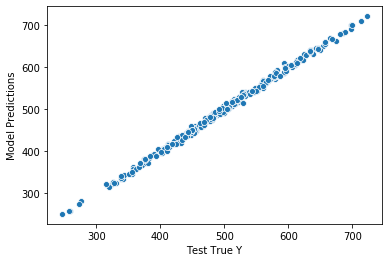

In [78]:
#scatter plot of our model predictions vs true test results of y
sns.scatterplot(x='Test True Y', y='Model Predictions',data=pred_df)
#observations: we essentially see a perfect straight fitting line, our model
#is performing very well!

In [90]:
#calculate the error (difference between actuals and model predictions)
pred_df['Error'] = pred_df['Test True Y'] - pred_df['Model Predictions']

In [91]:
pred_df #now we have error

Test True Y  Model Predictions      Error
0     402.296319         405.581177  -3.284858
1     624.156198         623.970032   0.186167
2     582.455066         592.540588 -10.085522
3     578.588606         572.627930   5.960677
4     371.224104         366.890839   4.333265
..           ...                ...        ...
295   525.704657         529.418579  -3.713922
296   502.909473         515.705078 -12.795605
297   612.727910         610.072510   2.655401
298   417.569725         417.250427   0.319297
299   410.538250         411.173645  -0.635395

[300 rows x 3 columns]

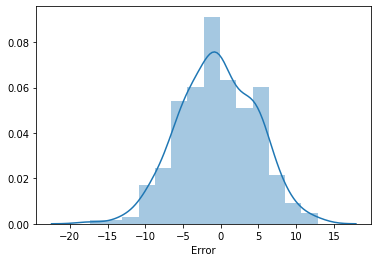

In [92]:
sns.distplot(pred_df['Error'])
#most of our residuals are centred around 0, this is good

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
#calculate MAE
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])
#observations: MAE = 4.0258, given that our mean price is ~$500, this is a good MAE!

4.025783897638245

In [95]:
#calculate MSE
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])
#observations: MSE = 25.1549

25.15491240825062

In [97]:
#essentially the same thing as our cost evaluation earlier...
#difference just due to precision

#copied from above
model.evaluate(X_test,y_test,verbose=0)
#getting back a MSE of 25.1549 on data the model's never seen before

25.154909642537437

In [109]:
#RMSE
np.sqrt(model.evaluate(X_test,y_test,verbose=0))

5.0154670413170335

# Predicting on brand new data

What if we just saw a brand new gemstone from the ground? What should we price it at? This is the **exact** same procedure as predicting on a new test data!

In [99]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [101]:
# Don't forget to scale!
new_gem = scaler.transform(new_gem)
#now we have the scaled version of these features

In [102]:
new_gem

array([[0.14117652, 0.53968792]])

In [103]:
#run our model on this new gem observations
model.predict(new_gem)
#observation: model predicts a price of $420

array([[419.99417]], dtype=float32)

## Saving and Loading a Model

In [104]:
#this comes in hand if we are running a very complex model that took a lot of
#time to train
from tensorflow.keras.models import load_model

In [105]:
model.save('my_gem_model.h5')  # creates a HDF5 file 'my_model.h5'

In [107]:
#if we were in a new notebook x days later and wanted to rerun this model...
future_model = load_model('my_gem_model.h5')

In [108]:
future_model.predict(new_gem)
#model works just as it did before

array([[419.99417]], dtype=float32)